#  Titanic Survival Prediction Using Machine Learning 

# Importing Libraries 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data


In [7]:
test_data = pd.read_csv(r"C:\Users\lenovo\Downloads\titanic\test.csv")
train_data= pd.read_csv(r"C:\Users\lenovo\Downloads\titanic\train.csv")

# EDA

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
# categorial data
df_cat=train_data[["Survived", "Sex", "Cabin", "Embarked", "Ticket"]]
# numerical data
df_num = train_data[["Age", "SibSp", "Parch", "Fare"]]

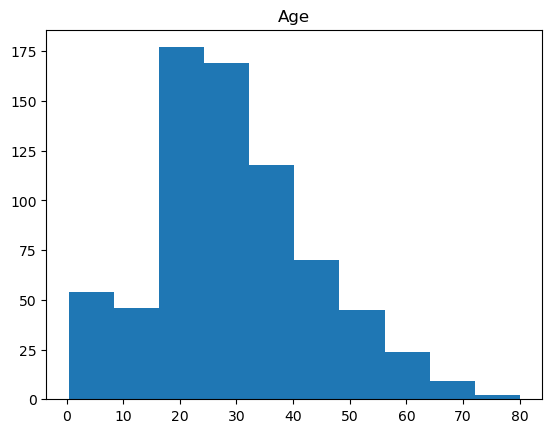

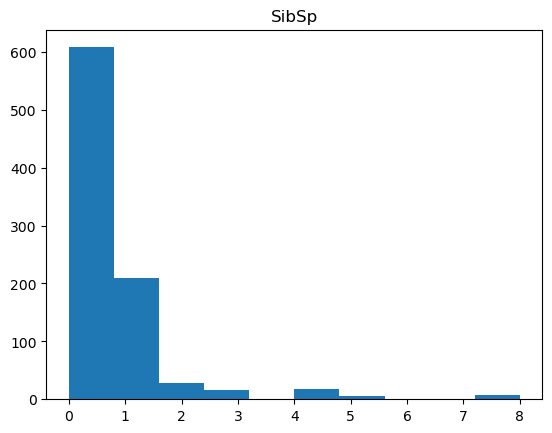

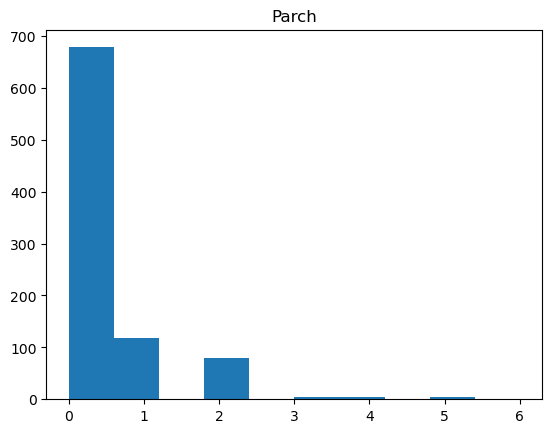

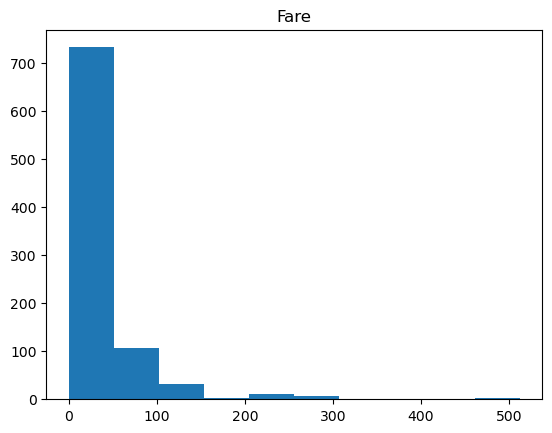

In [17]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

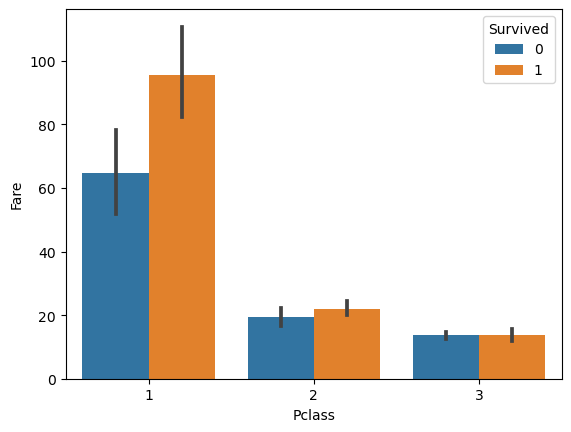

In [18]:
# check the passenger who survived in pclass and fare of pclass
sns.barplot(data=train_data, x="Pclass", y="Fare", hue="Survived")


In [19]:
pd.pivot_table(train_data, index="Survived", values=["Age", "SibSp", "Parch", "Fare"])


,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


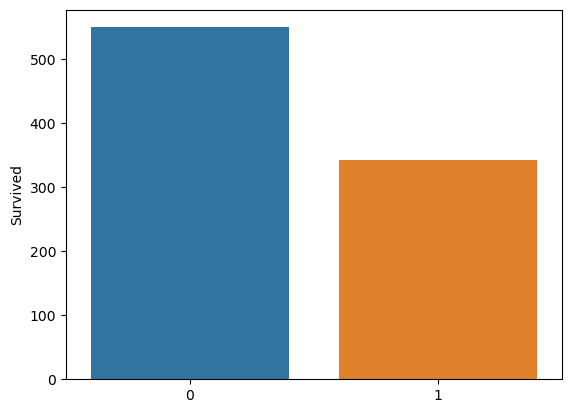

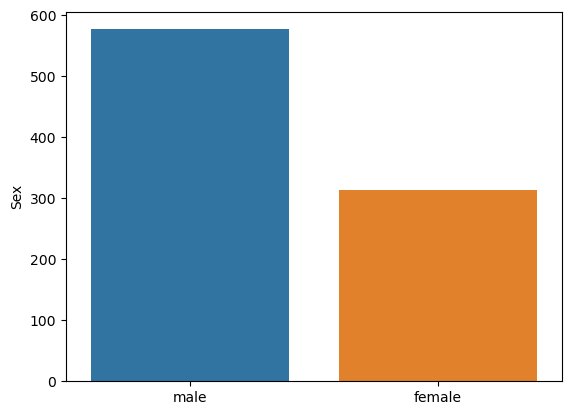

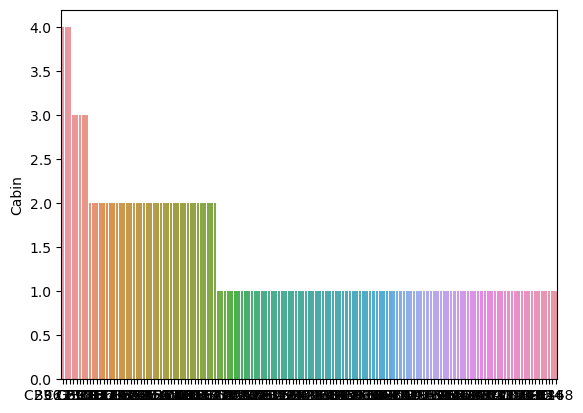

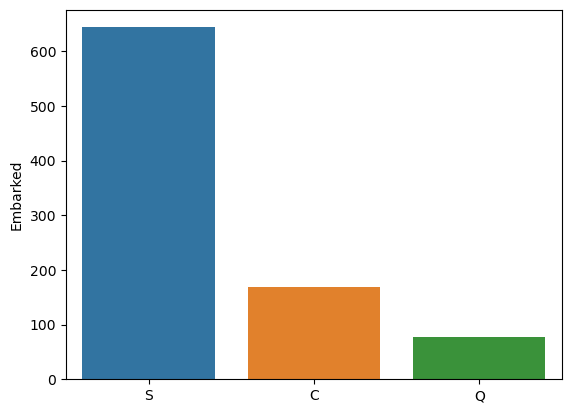

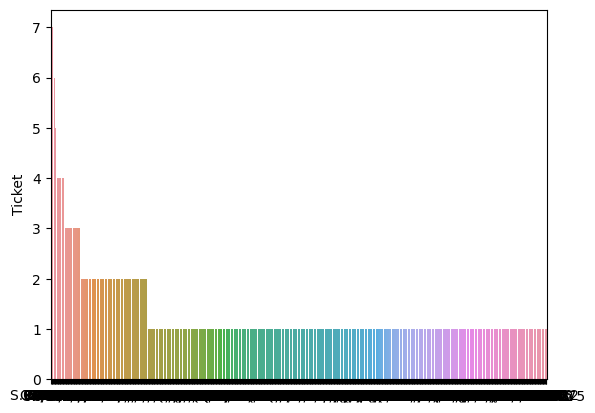

In [22]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts())
    plt.show()


In [23]:
x = pd.DataFrame(
    (
        pd.pivot_table(
            train_data,
            index="Survived",
            columns="Sex",
            values="Ticket",
            aggfunc="count",
        )
    )
)
print()
print(
    pd.pivot_table(
        train_data, index="Survived", columns="Pclass", values="Ticket", aggfunc="count"
    )
)
print()
print(
    pd.pivot_table(
        train_data,
        index="Survived",
        columns="Embarked",
        values="Ticket",
        aggfunc="count",
    )
)
print()
x


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



Sex,female,male
Survived,,
0,81,468
1,233,109


# Data Cleaning

In [27]:
# we can drop columns passengerID,cabin,name ,ticket as the does not effect to our target variable that much
train_data = train_data.drop(columns=["PassengerId", "Cabin", "Name", "Ticket"])


In [26]:
train_data.isnull().sum()

# we can see there are missing values in Age,Cabin and Embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())


In [29]:
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])


In [30]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Feature Engineering

In [31]:
train_data["Fare"] = np.log(train_data["Fare"] + 1)


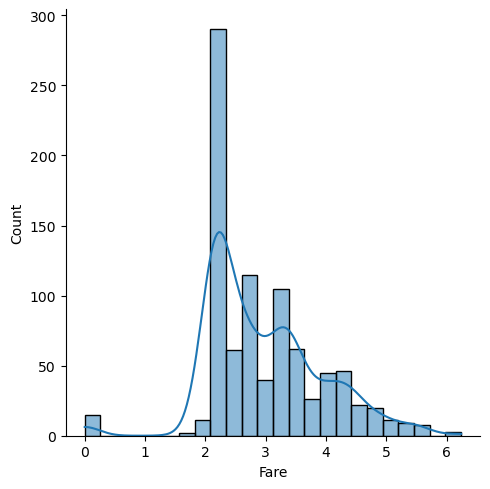

In [32]:
sns.displot(train_data["Fare"], kde=True)


<AxesSubplot:>

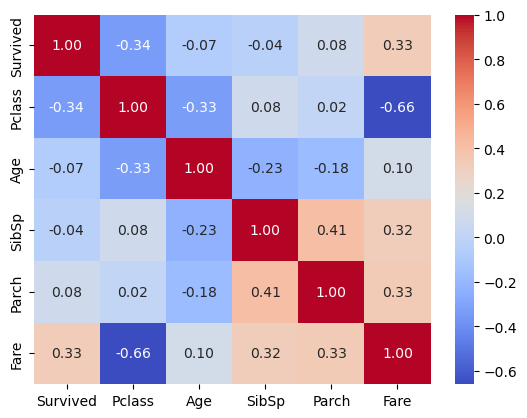

In [34]:
corr = train_data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

In [35]:
from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Embarked"]
le = LabelEncoder()
for col in cols:
    train_data[col] = le.fit_transform(train_data[col])

train_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,2.110213,2
1,1,1,0,38.0,1,0,4.280593,0
2,1,3,0,26.0,0,0,2.188856,2
3,1,1,0,35.0,1,0,3.990834,2
4,0,3,1,35.0,0,0,2.202765,2


In [36]:
X = train_data.drop(columns=["Survived"], axis=1)
y = train_data["Survived"]
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,2.110213,2
1,1,1,0,38.000000,1,0,4.280593,0
2,1,3,0,26.000000,0,0,2.188856,2
3,1,1,0,35.000000,1,0,3.990834,2
4,0,3,1,35.000000,0,0,2.202765,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,2.639057,2
887,1,1,0,19.000000,0,0,3.433987,2
888,0,3,0,29.699118,1,2,3.196630,2
889,1,1,1,26.000000,0,0,3.433987,0


# tuning of parameter

In [39]:
from sklearn.model_selection import train_test_split,cross_val_score

In [42]:
# define a function to test different models
def testing(model):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=40)
    model.fit(X_train,y_train)
    Accuracy=model.score(X_test,y_test)
    print('Accuracy:',Accuracy)
    score=cross_val_score(model,X,y,cv=5)
    print('CV score:',np.mean(score))

In [43]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
testing(model)

Accuracy: 0.7802690582959642
CV score: 0.7778042809616471


In [48]:
import lightgbm as lgb

In [46]:
pip install lightgbm


     ---------------------------------------- 1.4/1.4 MB 1.6 MB/s eta 0:00:00


In [49]:
model=lgb.LGBMClassifier()
testing(model)

[LightGBM] [Info] Number of positive: 247, number of negative: 421
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369760 -> initscore=-0.533244
[LightGBM] [Info] Start training from score -0.533244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [51]:
from xgboost import XGBClassifier

model = XGBClassifier()
testing(model)

Accuracy: 0.8026905829596412
CV score: 0.8125980792166217


In [52]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
testing(model)

Accuracy: 0.8116591928251121
CV score: 0.8092210156299039


In [53]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
testing(model)

Accuracy: 0.8026905829596412
CV score: 0.7890402360178268


In [55]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
testing(model)

Accuracy: 0.8116591928251121
CV score: 0.7833971502102819


#  the best model are LogisticRegressore and Randomforest
# with an accuracy rate of 81%